In [39]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

C:\Users\dhruv\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dhruv\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dhruv\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [40]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [41]:
X_train.shape

(60000, 28, 28)

In [42]:
len(X_train)

60000

In [43]:
X_test.shape

(10000, 28, 28)

In [44]:
Y_train.shape

(60000,)

In [45]:
Y_test.shape
 

(10000,)

In [46]:
Y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

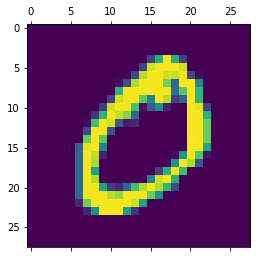

In [47]:
plt.matshow(X_train[1])

In [48]:
Y_train[1]

0

In [49]:
X_train = X_train/255
X_test = X_test/255

In [50]:
#Let's first flattened the X_train and X_test dataset to One-demensional array!!

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [51]:
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [52]:
#Let's built Simple NeuralNetwork with only Input layer!!

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4923 - acc: 0.8758
Epoch 2/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3065 - acc: 0.9155
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2855 - acc: 0.9213
Epoch 4/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2751 - acc: 0.9237
Epoch 5/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2679 - acc: 0.9258


In [53]:
model.evaluate(X_test_flattened, Y_test)

10000/10000 [==============================] - 0s 23us/sample - loss: 0.2645 - acc: 0.9274


[0.26448735306859017, 0.9274]

In [54]:
#Lets do predictions inorder to test our model!!

y_pred = model.predict(X_test_flattened)

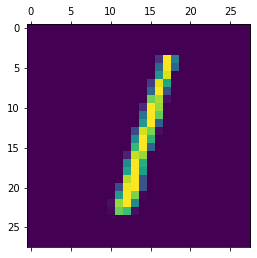

In [55]:
plt.matshow(X_test[2])

In [56]:
y_pred[2]

array([1.9371510e-06, 4.8662579e-01, 1.0102212e-02, 2.2735298e-03,
       1.4072657e-04, 6.7767501e-04, 1.1568069e-03, 1.0779202e-03,
       3.3446550e-03, 2.3078918e-04], dtype=float32)

In [57]:
#Thus we say that, model predicts pretty good!!

np.argmax(y_pred[2])

1

In [68]:
#Lets build a NeuralNetwork with "Hidden Layer", inorder to improve our model performance!!


model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')

])

model.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2897 - acc: 0.9203
Epoch 2/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1360 - acc: 0.9600
Epoch 3/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0957 - acc: 0.9721
Epoch 4/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0748 - acc: 0.9775
Epoch 5/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0613 - acc: 0.9817


In [69]:
model.evaluate(X_test_flattened, Y_test)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.0960 - acc: 0.9700


[0.09597552234288305, 0.97]

In [70]:
#As it is visible that, accuracy of the model increase from 92% to 97% because of hidden layer!!